# 1. Linear Classifiers (logistic regression and GDA)
In this problem, we cover two probabilistic linear classifiers we have covered in class so far. First, a discriminative linear classifier: logistic regression. Second, a generative linear classifier: Gaussian discriminant analysis (GDA). Both the algorithms find a linear decision boundary that separates the data into two classes, but make different assumptions. Our goal in this problem is to get a deeper understanding of the similarities and differences (and, strengths and weaknesses) of these two algorithms.

For this problem, we will consider two datasets, provided in the following files: 

i. `data/ds1_{train,valid}.csv`

ii. `data/ds2_{train,valid}.csv`

Each file contains m examples, one example $(x^{(i)}, y^{(i)})$ per row. In particular, the $i$-th row
contains columns $x_0^{(i)} \in \mathbb{R}$, $x_1^{(i)} \in \mathbb{R}$, and $y^{(i)}\in\{0,1\}$. In the subproblems that follow, we will investigate using logistic regression and Gaussian discriminant analysis (GDA) to perform binary classification on these two datasets.


<b>(a)</b> [10 points] In lecture we saw the average empirical loss for logistic regression: 

\begin{align*}
J(\theta) = -{1\over m}\sum_{i=1}^{m} y^{(i)}\log\big(h_{\theta}(x^{(i)})\big) + \big(1-y^{(i)}\big)\log\big(1-h_
{\theta}(x^{(i)})\big)
\end{align*}

where $y^{(i)}\in \{0,1\}$, $h_{\theta}(x) = g(\theta^Tx)$ and $g(z) = \frac{1}{1+e^{-z}}$.

Find the Hessian $H$ of this function, and show that for any vector $z$, it holds true that
$z^T H z\geq 0$.

<b>Hint</b> : You may want to start by showing that $\sum_{i}\sum_{j}z_ix_ix_jz_j = (x^Tz)^2\geq 0$. Recall also
that $g'(z)=g(z)(1-g(z))$.

<b>Remark</b>: This is one of the standard ways of showing that the matrix $H$ is positive semi-
definite, written “$H \succeq 0$.” This implies that $J$ is convex, and has no local minima other
than the global one. If you have some other way of showing $H \succeq 0$, you’re also welcome to use your method instead of the one above.

### Answer:

It suffices to show that $j(\theta) = -y\log\big(h_{\theta}(x)\big) + \big(1-y\big)\log\big(1-h_
{\theta}(x)\big)$ is convext for each $y\in\{0,1\}$. 
    
Note
\begin{align*}
\frac{\partial j(\theta)}{\partial \theta} & =   -y\frac{g(\theta^Tx)(1-g(\theta^Tx))}{g(\theta^Tx)}x + 
(1-y)\frac{g(\theta^Tx)(1-g(\theta^Tx)}{1-g(\theta^Tx)}x\\
    & =  -y(1-g(\theta^Tx))x + (1-y)g(\theta^Tx)x \\
    & =  (g(\theta^Tx) - y)x
\end{align*}
and consequently

\begin{align*}
\frac{\partial^2 j(\theta)}{\partial^2 \theta} = g(\theta^Tx)(1-g(\theta^Tx)xx^T
\end{align*}

which is clearly a positive semi-definite matrix since $g(\theta^Tx)\in(0,1)$ and

\begin{align*}
z^T xx^T z = (x^T z)^T (x^T z) = (x^T z)^2\geq 0.
\end{align*}

<b> (b)</b> [5 points] <b>Coding problem.</b> 

Follow the instructions in src/p01b_logreg.py to train a logistic regression classifier using Newton's Method. Starting with $\theta = \overrightarrow{0}$, run Newton's Method until the updates to $\theta$ are small: Specifically, train until the first iteration $k$ such that $\|\theta_k-\theta_{k-1}\|_1\leq \epsilon$, where $\epsilon=10^{-5}$. Make sure to write your model's predictions to the file specified in the code.

### Answer:

In [2]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel

import matplotlib.pyplot as plt

In [3]:
train_path_1 = "data/ds1_train.csv"
valid_path_1 = "data/ds1_valid.csv"

train_path_2 = "data/ds2_train.csv"
valid_path_2 = "data/ds2_valid.csv"


# data sets ready for use in logistic regression
x_trainlg_1, y_trainlg_1 = util.load_dataset(train_path_1, add_intercept=True)
x_trainlg_2, y_trainlg_2 = util.load_dataset(train_path_2, add_intercept=True)


x_validlg_1, y_validlg_1 = util.load_dataset(valid_path_1, add_intercept=True)
x_validlg_2, y_validlg_2 = util.load_dataset(valid_path_2, add_intercept=True)

In [4]:
x_trainlg_1

array([[  1.        ,   2.91180854,  60.35961272],
       [  1.        ,   3.77474554, 344.1492843 ],
       [  1.        ,   2.61548828, 178.22208681],
       ...,
       [  1.        ,   2.96909526,  20.24997848],
       [  1.        ,   3.95753102,  27.26196973],
       [  1.        ,   4.02533402,  12.23316511]])

In [5]:
np.sum(y_trainlg_1), np.sum(1 - y_trainlg_1)

(400.0, 400.0)

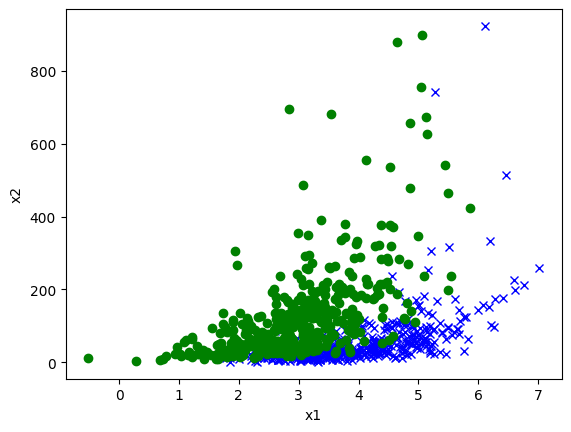

In [6]:
util.plot(x_trainlg_1, y_trainlg_1)

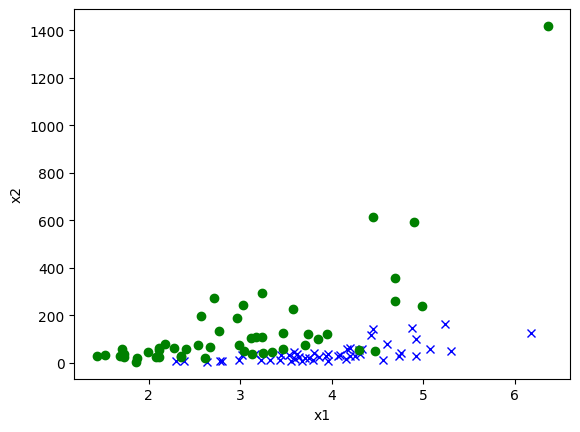

In [7]:
util.plot(x_validlg_1, y_validlg_1)

In [8]:
def g(theta, x):
    """
    input:
    theta: parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    sigmoid of examples, shape: (m,)
    """

    return 1 / (1 + np.exp(-x @ theta))


def dJ(theta, x, y):
    """
    input:
    theta parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    gradient of J(theta), shape:(n,)
    """

    m, _ = x.shape  # number of datas
    return 1 / m * x.T @ (g(theta, x) - y)


def HJ(theta, x):
    """
    input:
    theta parameter, shape: (n,)
    x: whole examples, shape: (m, n)

    output:
    Hessian of J(theta), shape:(n,n)
    """

    m, _ = x.shape
    Z = g(theta, x)
    Z = Z * (1 - Z)  # (m,)
    return 1 / m * Z * x.T @ x


def dist(x, y):
    return np.sum(np.abs(x - y))

In [9]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """

        _, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)

        # *** START CODE HERE ***
        for _ in range(self.max_iter):
            theta_new = self.theta - np.linalg.inv(HJ(self.theta, x)) @ dJ(
                self.theta, x, y
            )
            self.theta = theta_new
            if dist(theta_new, self.theta) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return x @ self.theta >= 0
        # *** END CODE HERE ***

In [10]:
lg1 = LogisticRegression()
lg1.fit(x_trainlg_1, y_trainlg_1)

Theta:  [-6.26018491  2.47707251 -0.0299125 ]
Training accuracy:  0.8825


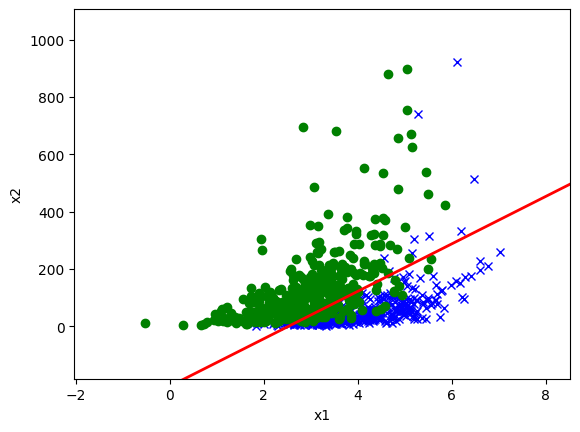

In [11]:
util.plot(x_trainlg_1, y_trainlg_1, theta=lg1.theta)
print("Theta: ", lg1.theta)
print("Training accuracy: ", np.mean(lg1.predict(x_trainlg_1) == y_trainlg_1))

Validation accuracy:  0.9


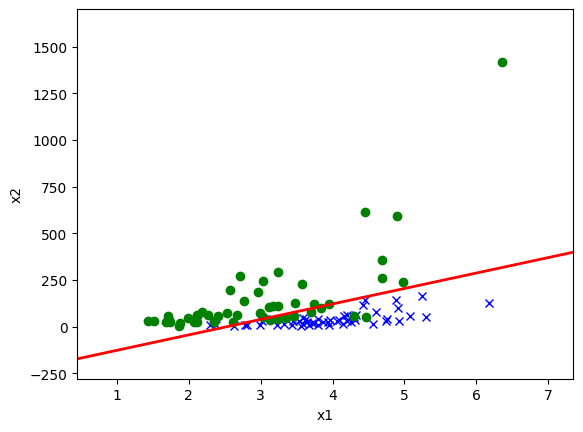

In [12]:
util.plot(x_validlg_1, y_validlg_1, theta=lg1.theta)
print("Validation accuracy: ", np.mean(lg1.predict(x_validlg_1) == y_validlg_1))

<b>(c)</b> [5 points] Recall that in GDA we model the joint distribution of $(x,y)$ by the following equations:

\begin{align*}
p(y) &= 
\begin{cases}
\phi & \text{if } y=1\\
1-\phi & \text{if } y=0
\end{cases}
\end{align*}

\begin{align*}
p(x|y=0) &= \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)\right)
\end{align*}

\begin{align*}
p(x|y=1) &= \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\right)
\end{align*}

where $\phi, \mu_0, \mu_1, \Sigma$ are the parameters of our model.

Suppose we have already fit $\phi, \mu_0, \mu_1,$ and $\Sigma$, and now want to predict $y$ given a new point $x$. To show that GDA results in a classifier that has a linear decision boundary, show the posterior distribution can be written as

\begin{align*}
p(y=1|x; \phi, \mu_0, \mu_1, \Sigma) = \frac{1}{1+\exp\left(-(\theta^T x + \theta_0)\right)}
\end{align*}

where $\theta\in\mathbb{R}^n$ and $\theta_0\in \mathbb{R}$ are appropriate functions of $\phi, \mu_0, \mu_1,$ and $\Sigma$.

### Answer:

\begin{align*}
p(y=1|x; \phi, \mu_0, \mu_1, \Sigma) & = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0)p(y=0)} \\
& = \frac{1}{1 + \frac{p(x|y=0)}{p(x|y=1)}\frac{(1-\phi)}{\phi}}\\
& = \frac{1}{1 + \exp \big( \frac{1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) - \frac{1}{2} (x - \mu_0)^T \Sigma^{-1} (x - \mu_0) \big) \frac{1 - \phi}{\phi}} \\
& = \frac{1}{1 + \exp \left( -(\mu_1 - \mu_0)^T \Sigma^{-1} x - \frac{1}{2}(\mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1) + \log \frac{1 - \phi}{\phi}) \right)} \\
& = \frac{1}{1 + \exp \big( -(\theta^T x + \theta_0) \big)}
\end{align*}

where $\theta = \Sigma^{-1}(\mu_1 - \mu_0)$ and $\theta_0 =\frac{1}{2} \left(\mu_0^T \Sigma^{-1} \mu_0 - \mu_1^T \Sigma^{-1} \mu_1\right) - \log \frac{1 - \phi}{\phi}$.


<b>(d)</b> [7 points] For this part of the problem only, you may assume $n$ (the dimension of $x$) is $1$, so that $\Sigma = [\sigma^2]$ is just a real number, and likewise the determinant of $\Sigma$ is given by $|\Sigma| = \sigma^2$. Given the dataset, we claim that the maximum likelihood estimates of the parameters are given by

$$\phi = \frac{1}{m}\sum_{i=1}^m 1_{\{y^{(i)}=1\}}$$
$$\mu_0 = \frac{\sum_{i=1}^m 1_{\{y^{(i)}=0\}}x^{(i)}}{\sum_{i=1}^m 1_{\{y^{(i)}=0\}}}$$
$$\mu_1 = \frac{\sum_{i=1}^m 1_{\{y^{(i)}=1\}}x^{(i)}}{\sum_{i=1}^m 1_{\{y^{(i)}=1\}}}$$
$$\Sigma = \frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T$$

The log-likelihood of the data is
\begin{align*}
l(\phi, \mu_0, \mu_1, \Sigma) &= \log \prod_{i=1}^{m}p(x^{(i)},y^{(i)};\phi, \mu_0, \mu_1, \Sigma)\\
& = \log \prod_{i=1}^{m}p(x^{(i)}|y^{(i)};\mu_0, \mu_1, \Sigma)p(y^{(i)}|\phi)
\end{align*}

By maximizing $l$ with respect to the four parameters, prove that the maximum likelihood estimates of $\phi, \mu_0, \mu_1$, and $\Sigma$ are indeed as given in the formulas above. (You may assume that there is at least one positive and one negative example, so that the denominators in the definitions of $\mu_0$ and $\mu_1$ above are non-zero.)

### Answer: 
The log-likelihood of data is 
\begin{align*}
l(\phi, \mu_0, \mu_1, \Sigma)
& =C-\frac{m}{2}\log|\Sigma|^{-1}+ \sum_{i=1}^{m}\left(-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^T\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}}) + y^{(i)}\log\phi + (1-y^{(i)})\log(1-\phi)\right).
\end{align*}

Lets compute $\frac{\partial l}{\partial\phi}$ and set it to $0$.
\begin{align*}
    \frac{\partial l}{\partial\phi} 
    &= \sum_{i=1}^{m}\left(y^{(i)}\frac{1}{\phi} - (1-y^{(i)})\frac{1}{1-\phi}\right)=0.
\end{align*}  
This simply implies that 
$$\hat{\phi} = \frac{\sum_{i=1}^{m}y^{(i)}}{m}.$$

    
Now, lets compute $\frac{\partial l}{\partial\mu_0}$ and set it to $0$.

\begin{align*}
    \frac{\partial l}{\partial\mu_0} 
    & = \sum_{i=1}^{m} 1_{\{y^{(i)}=0\}}\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}})=0
\end{align*}
This concludes
\begin{align*}
\hat{\mu}_0 = \frac{\sum_{i=1}^{m}1_{\{y^{(i)}=0\}}x^{(i)}}{\sum_{i=1}^{m}1_{\{y^{(i)}=0\}} }
\end{align*}

and similarly
\begin{align*}
\hat{\mu}_1 = \frac{\sum_{i=1}^{m}1_{\{y^{(i)}=1\}}x^{(i)}}{\sum_{i=1}^{m}1_{\{y^{(i)}=1\}} }.
\end{align*}

Finally, to compute $\hat{\Sigma}$, we should solve $\frac{\partial l}{\partial\Sigma} = 0$.
Lets remind that (see the lecture note)
    
\begin{align*}
\frac{\partial\log|A|}{\partial A}  = A^{-T}.
\end{align*}
    
Therefore
\begin{align*}
    \frac{\partial l}{\partial A} & = \frac{m}{2}\Sigma + 
    \sum_{i=1}^{m}-\frac{1}{2}(x-\mu_{y^{(i)}})(x-\mu_{y^{(i)}})^T = 0
\end{align*}
implies 
\begin{align*}
\hat{\Sigma} = \frac{1}{m}\sum_{i=1}^{m}(x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T.
\end{align*}

<b>(e)</b> [3 points] <b> Coding problem.</b> 

In src/p01egda.py, fill in the code to calculate $\phi, \mu_0, \mu_1$, and $\Sigma$, use these parameters to derive $\theta$, and use the resulting GDA model to make predictions on the validation set.
### Answer:  

In [13]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m = x.shape[0]

        self.phi = np.mean(y)
        self.mu_0 = 1 / np.sum(1 - y) * np.sum(x[y == 0], axis=0)
        self.mu_1 = np.mean(x[y == 1], axis=0)

        mu = (1 - y).reshape(-1, 1) * self.mu_0 + y.reshape(-1, 1) * self.mu_1
        self.Sigma = 1 / m * (x - mu).T @ (x - mu)

        Sigma_inv = np.linalg.inv(self.Sigma)

        theta = Sigma_inv @ (self.mu_1 - self.mu_0)
        theta_0 = 1 / 2 * (
            self.mu_0.T @ Sigma_inv @ self.mu_0 - self.mu_1.T @ Sigma_inv @ self.mu_1
        ) - np.log((1 - self.phi) / self.phi)

        self.theta = np.insert(theta, 0, theta_0)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return util.add_intercept(x) @ self.theta >= 0
        # *** END CODE HERE

<b>(f)</b> [5 points] For Dataset 1, create a plot of the validation set with $x_1$ on the horizontal axis, and $x_2$ on the vertical axis. To visualize the two classes, use a different symbol for examples $x^{(i)}$ with $y^{(i)}=0$ than for those with $y^{(i)} = 1$. On the same figure, plot the decision boundary found by logistic regression in part (b). Make an identical plot with the decision boundary found by GDA in part (e).
### Answer: 

In [14]:
#data sets ready for use in GDA
x_traingda_1, y_traingda_1 = util.load_dataset(train_path_1, add_intercept=False)
x_traingda_2, y_traingda_2 = util.load_dataset(train_path_2, add_intercept=False)


x_validgda_1, y_validgda_1 = util.load_dataset(valid_path_1, add_intercept=False)
x_validgda_2, y_validgda_2 = util.load_dataset(valid_path_2, add_intercept=False)

x_traingda_1

array([[  2.91180854,  60.35961272],
       [  3.77474554, 344.1492843 ],
       [  2.61548828, 178.22208681],
       ...,
       [  2.96909526,  20.24997848],
       [  3.95753102,  27.26196973],
       [  4.02533402,  12.23316511]])

In [15]:
gda1 = GDA()
gda1.fit(x_traingda_1, y_traingda_1)

Theta:  [-6.17158405  2.22055506 -0.01763375]
Training accuracy using GDA:  0.86625
Training accuracy using logistic regresion:  0.8825


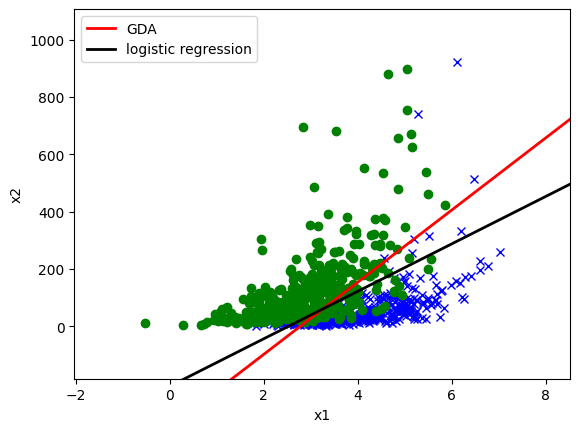

In [16]:
util.plot(x_traingda_1, y_traingda_1, theta=gda1.theta, theta_2 = lg1.theta, 
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Theta: ", gda1.theta)
print("Training accuracy using GDA: ", np.mean(gda1.predict(x_traingda_1) == y_traingda_1))
print("Training accuracy using logistic regresion: ", np.mean(lg1.predict(x_trainlg_1) == y_trainlg_1))

Theta:  [-6.17158405  2.22055506 -0.01763375]
Validation accuracy using GDA:  0.83
Validation accuracy using logistic regresion:  0.9


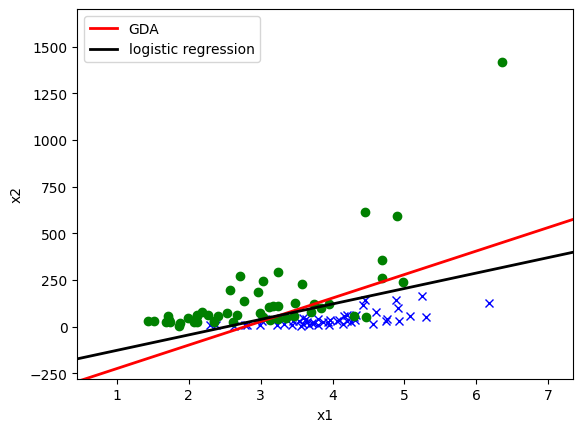

In [17]:
util.plot(x_validgda_1, y_validgda_1, theta=gda1.theta, theta_2 = lg1.theta, 
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Theta: ", gda1.theta)
print("Validation accuracy using GDA: ", np.mean(gda1.predict(x_validgda_1) == y_validgda_1))
print("Validation accuracy using logistic regresion: ", np.mean(lg1.predict(x_validlg_1) == y_validlg_1))

<b>(g)</b> [5 points] Repeat the steps in part (f) for Dataset 2. On which dataset does GDA seem to perform worse than logistic regression? Why might this be the case?
### Answer: 
On the data set 1, GDA performs worse than logistic regression and this is probably due to the possibility that the $x$'s are not generated by Gaussian distributaions as we assumed.

Theta for GDA:  [ 2.50874989  3.76951271 -3.94657107]
Theta for lg:  [ 2.38425454  3.6371206  -3.81234337]
Training accuracy using GDA:  0.91375
Training accuracy using logistic regresion:  0.915


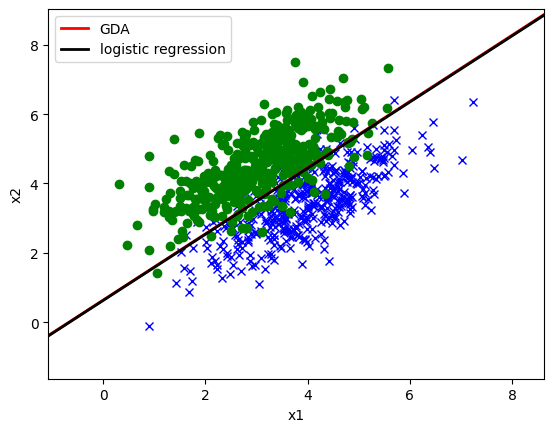

In [18]:
lg2 = LogisticRegression()
lg2.fit(x_trainlg_2, y_trainlg_2)

gda2 = GDA()
gda2.fit(x_traingda_2, y_traingda_2)


util.plot(x_traingda_2, y_traingda_2, theta=gda2.theta, theta_2 = lg2.theta, 
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Theta for GDA: ", gda2.theta)
print("Theta for lg: ", lg2.theta)
print("Training accuracy using GDA: ", np.mean(gda2.predict(x_traingda_2) == y_traingda_2))
print("Training accuracy using logistic regresion: ", np.mean(lg2.predict(x_trainlg_2) == y_trainlg_2))


Validation accuracy using GDA:  0.91
Validation accuracy using logistic regresion:  0.91


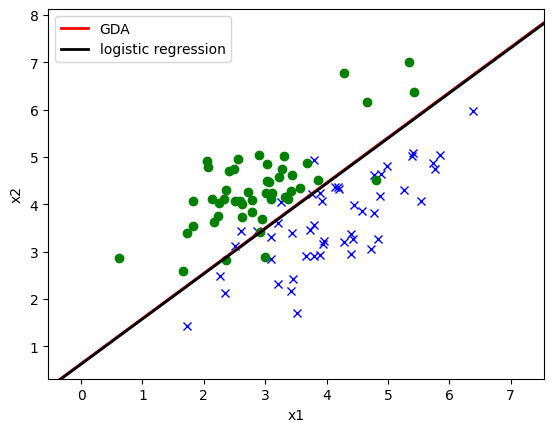

In [19]:
util.plot(x_validgda_2, y_validgda_2, theta=gda2.theta, theta_2 = lg2.theta, 
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Validation accuracy using GDA: ", np.mean(gda2.predict(x_validgda_2) == y_validgda_2))
print("Validation accuracy using logistic regresion: ", np.mean(lg2.predict(x_validlg_2) == y_validlg_2))

<b>(h)</b> [3 extra credit points] For the dataset where GDA performed worse in parts (f) and (g), can you find a transformation of the x(i)’s such that GDA performs significantly better? What is this transformation?
### Answer: 
It seems that $x_2$ grows exponentioally as $x_1$ groww. Therefore, $x_2' = \log x_2$ might be a good transformation. Lets check it!

In [20]:
x_traingda_1_transformed = x_traingda_1.copy()
x_traingda_1_transformed[:, 1] = np.log(x_traingda_1_transformed[:, 1])


x_validgda_1_transformed = x_validgda_1.copy()
x_validgda_1_transformed[:, 1] = np.log(x_validgda_1_transformed[:, 1])



x_trainlg_1_transformed = x_trainlg_1.copy()
x_trainlg_1_transformed[:, -1] = np.log(x_trainlg_1_transformed[:, -1])


x_validlg_1_transformed = x_validlg_1.copy()
x_validlg_1_transformed[:, -1] = np.log(x_validlg_1_transformed[:, -1])


In [21]:
print(x_traingda_1_transformed)

[[2.91180854 4.10032022]
 [3.77474554 5.84107553]
 [2.61548828 5.18303045]
 ...
 [2.96909526 3.00815373]
 [3.95753102 3.30549268]
 [4.02533402 2.50415072]]


In [22]:
gda3 = GDA()
gda3.fit(x_traingda_1_transformed, y_traingda_1)

lg3 = LogisticRegression()
lg3.fit(x_trainlg_1_transformed, y_trainlg_1)

Training accuracy using GDA:  0.9125
Training accuracy using logistic regresion:  0.91


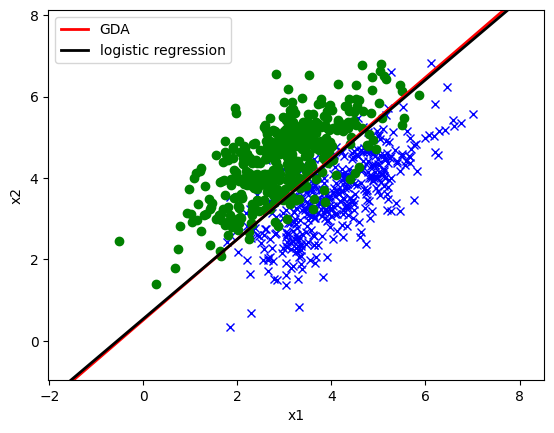

In [23]:
util.plot(x_traingda_1_transformed, y_traingda_1, theta=gda3.theta, theta_2=lg3.theta,
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Training accuracy using GDA: ", np.mean(gda3.predict(x_traingda_1_transformed) == y_traingda_1))
print("Training accuracy using logistic regresion: ", np.mean(lg3.predict(x_trainlg_1_transformed) == y_traingda_1))


Validation accuracy using GDA:  0.95
Validation accuracy using logistic regresion:  0.95


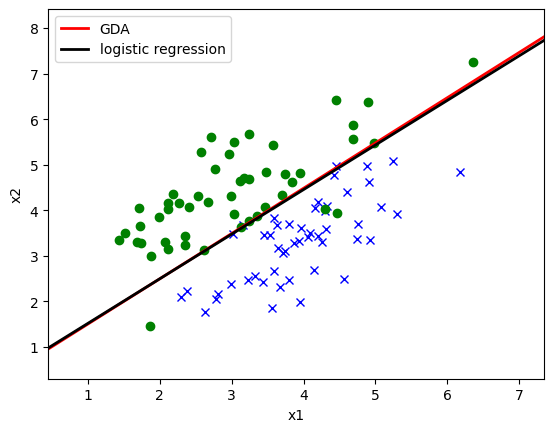

In [24]:
util.plot(x_validgda_1_transformed, y_validgda_1, theta=gda3.theta, theta_2=lg3.theta,
          label_1 = 'GDA', label_2 = 'logistic regression')
print("Validation accuracy using GDA: ", np.mean(gda3.predict(x_validgda_1_transformed) == y_validgda_1))
print("Validation accuracy using logistic regresion: ", np.mean(lg3.predict(x_validlg_1_transformed) == y_validlg_1))
